# TensorFlow Regression Example

## Creating Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [13]:
noise = np.random.randn(len(x_data))

In [14]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [15]:
x_df=pd.DataFrame(data=x_data, columns=['X Data'])

In [16]:
print(x_df)

          X Data
0        0.00000
1        0.00001
2        0.00002
3        0.00003
4        0.00004
5        0.00005
6        0.00006
7        0.00007
8        0.00008
9        0.00009
10       0.00010
11       0.00011
12       0.00012
13       0.00013
14       0.00014
15       0.00015
16       0.00016
17       0.00017
18       0.00018
19       0.00019
20       0.00020
21       0.00021
22       0.00022
23       0.00023
24       0.00024
25       0.00025
26       0.00026
27       0.00027
28       0.00028
29       0.00029
...          ...
999970   9.99971
999971   9.99972
999972   9.99973
999973   9.99974
999974   9.99975
999975   9.99976
999976   9.99977
999977   9.99978
999978   9.99979
999979   9.99980
999980   9.99981
999981   9.99982
999982   9.99983
999983   9.99984
999984   9.99985
999985   9.99986
999986   9.99987
999987   9.99988
999988   9.99989
999989   9.99990
999990   9.99991
999991   9.99992
999992   9.99993
999993   9.99994
999994   9.99995
999995   9.99996
999996   9.999

In [22]:
y_df=pd.DataFrame(data=y_true, columns=['Y'])

In [26]:
y_df.head()

,Y
0,5.580631
1,4.277024
2,3.465341
3,5.076227
4,6.250029


In [28]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [29]:
my_data.head()  # The first top 5 first

,X Data,Y
0,0.00000,5.580631
1,0.00001,4.277024
2,0.00002,3.465341
3,0.00003,5.076227
4,0.00004,6.250029


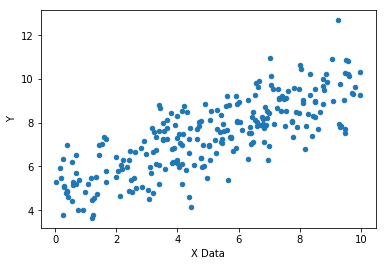

In [46]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [47]:
import tensorflow as tf

In [48]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [49]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [50]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [51]:
y_model = m*xph + b

** Loss Function **

In [52]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [53]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [54]:
init = tf.global_variables_initializer()

### Session

In [55]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [56]:
model_m

0.4600069

In [57]:
model_b

4.941792

### Results

In [68]:
y_hat = x_data * model_m + model_b

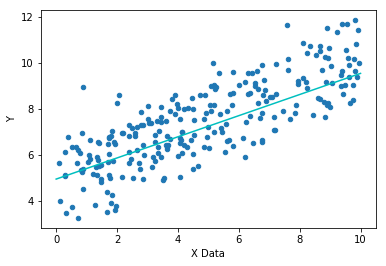

In [69]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'C')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [70]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [71]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fad186d1490>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmp7fysj2', '_save_summary_steps': 100}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [79]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [80]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [81]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [82]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [83]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp7fysj2/model.ckpt.
INFO:tensorflow:loss = 308.91168, step = 1
INFO:tensorflow:global_step/sec: 986.359
INFO:tensorflow:loss = 7.9227424, step = 101 (0.106 sec)
INFO:tensorflow:global_step/sec: 1173.06
INFO:tensorflow:loss = 14.248509, step = 201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1176.25
INFO:tensorflow:loss = 14.265394, step = 301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1104.37
INFO:tensorflow:loss = 12.463424, step = 401 (0.090 sec)
INFO:tensorflow:global_step/sec: 1026.24
INFO:tensorflow:loss = 9.539155, step = 501 (0.097 sec)
INFO:tensorflow:global_step/sec: 1147.08
INFO:tensorflow:loss = 5.245236, step = 601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1102.85
INFO:tensorflow:loss = 7.805567, step = 701 (0.091 sec)
INFO:tensorflow:global_step/sec: 1139.46
INFO:tensorflow:loss = 1.779645, step = 801 (0.088 sec)
INFO:tensorflow:global_step/sec: 1088.7
INFO:tensorflow:loss

### Evaluation

In [84]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2019-04-16-00:36:21
INFO:tensorflow:Restoring parameters from /tmp/tmp7fysj2/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-16-00:36:22
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1706192, global_step = 1000, loss = 4.682477


In [85]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2019-04-16-00:47:29
INFO:tensorflow:Restoring parameters from /tmp/tmp7fysj2/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-16-00:47:30
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1791483, global_step = 1000, loss = 4.7165933


In [86]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1706192, 'global_step': 1000, 'loss': 4.682477}
eval metrics: {'average_loss': 1.1791483, 'global_step': 1000, 'loss': 4.7165933}


### Predictions

In [87]:
brand_new_data=np.linspace(0,10,10)

In [88]:
brand_new_data

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [89]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [92]:
estimator.predict(input_fn=input_fn_predict)

<generator object predict at 0x7facc7c2d0a0>

In [90]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmp7fysj2/model.ckpt-1000


[{'predictions': array([4.2180314], dtype=float32)},
 {'predictions': array([4.876562], dtype=float32)},
 {'predictions': array([5.535093], dtype=float32)},
 {'predictions': array([6.1936235], dtype=float32)},
 {'predictions': array([6.8521543], dtype=float32)},
 {'predictions': array([7.5106845], dtype=float32)},
 {'predictions': array([8.169215], dtype=float32)},
 {'predictions': array([8.827745], dtype=float32)},
 {'predictions': array([9.486277], dtype=float32)},
 {'predictions': array([10.144808], dtype=float32)}]

In [93]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmp7fysj2/model.ckpt-1000


In [81]:
predictions

[array([ 4.26618719], dtype=float32),
 array([ 4.91423559], dtype=float32),
 array([ 5.56228399], dtype=float32),
 array([ 6.21033192], dtype=float32),
 array([ 6.85838032], dtype=float32),
 array([ 7.50642872], dtype=float32),
 array([ 8.15447712], dtype=float32),
 array([ 8.80252552], dtype=float32),
 array([ 9.45057392], dtype=float32),
 array([ 10.09862137], dtype=float32)]

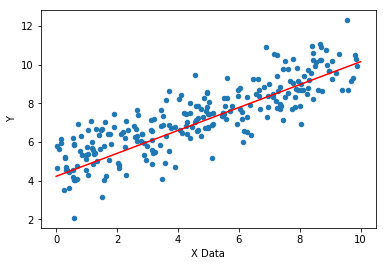

In [95]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

# Great Job!